# Features reduction based on Pearson Correlation

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

npf = pd.read_csv("data/npf_train.csv")


npf = npf.set_index("date")

## Tell that "class4" is categorical variable. (R does this automatically.)
npf["class4"] = npf["class4"].astype("category")

npf = npf.drop(["id","partlybad"],axis=1)
corr = npf.corr(method='pearson')

# 'Mean' parts

In [26]:
# CO2
CO2_mean_corr =corr.loc[corr.index.str.startswith(('CO2'))&corr.index.str.endswith(('mean')),\
    corr.columns.str.startswith(('CO2'))&corr.columns.str.endswith(('mean'))]

print(CO2_mean_corr.mean(axis=1))
print(CO2_mean_corr.min(axis=1))
CO2_mean_corr

CO2168.mean    0.998120
CO2336.mean    0.997925
CO242.mean     0.994094
CO2504.mean    0.997197
dtype: float64
CO2168.mean    0.993856
CO2336.mean    0.992314
CO242.mean     0.990206
CO2504.mean    0.990206
dtype: float64


,CO2168.mean,CO2336.mean,CO242.mean,CO2504.mean
CO2168.mean,1.000000,0.999712,0.993856,0.998910
CO2336.mean,0.999712,1.000000,0.992314,0.999671
CO242.mean,0.993856,0.992314,1.000000,0.990206
CO2504.mean,0.998910,0.999671,0.990206,1.000000


we can just select 1 CO2.mean feature instead 4.

In [27]:
radiation_mean_corr = corr.loc[corr.index.str.startswith(('Glob','NET','PAR','RGlob','UV'))&corr.index.str.endswith(('mean')),\
    corr.columns.str.startswith(('Glob','NET','PAR','RGlob','UV'))&corr.columns.str.endswith(('mean'))]

print(radiation_mean_corr.mean(axis=1))
print(radiation_mean_corr.min(axis=1))
radiation_mean_corr

Glob.mean     0.961670
NET.mean      0.942706
PAR.mean      0.964474
RGlob.mean    0.863735
UV_A.mean     0.960532
UV_B.mean     0.921942
dtype: float64
Glob.mean     0.893730
NET.mean      0.812037
PAR.mean      0.877762
RGlob.mean    0.748780
UV_A.mean     0.850098
UV_B.mean     0.748780
dtype: float64


,Glob.mean,NET.mean,PAR.mean,RGlob.mean,UV_A.mean,UV_B.mean
Glob.mean,1.000000,0.963074,0.995727,0.893730,0.986167,0.931324
NET.mean,0.963074,1.000000,0.970876,0.812037,0.970911,0.939337
PAR.mean,0.995727,0.970876,1.000000,0.877762,0.993144,0.949334
RGlob.mean,0.893730,0.812037,0.877762,1.000000,0.850098,0.748780
UV_A.mean,0.986167,0.970911,0.993144,0.850098,1.000000,0.962875
UV_B.mean,0.931324,0.939337,0.949334,0.748780,0.962875,1.000000


Notice we didn't include 'RPAR' here since others are not so much correlating with it, thus, we keep 'PAR' here and remove other 5 features

Keep one H2O.mean is enough
Keep one NOx.mean
Keep one NO.mean
Keep one O3.mean
Keep one RHIGA.mean
Keep one T.mean

# 'std' parts

Similar to 'mean' but in NO/NOx, we keep all the features.

Write previous steps and other processing in the first in function `feature_reduction()`

In [73]:
if 'lib.feature_selection' in sys.modules:  
    del sys.modules["lib.feature_selection"]

from lib.feature_selection import feature_reduction


npf = pd.read_csv("data/npf_train.csv")
new_data = feature_reduction(npf)
new_data

,class2,class4,NO168.std,NO336.std,NO42.std,NO504.std,NO672.std,NO84.std,NOx168.std,NOx336.std,...,H2O168.mean,H2O168.std,NO504.mean,NOx336.mean,O3.mean,O3.std,RHIRGA42.mean,RHIRGA42.std,T84.mean,T84.std
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,notevent,nonevent,0.071227,0.068031,0.047304,0.078741,0.055202,0.063907,0.772800,0.714154,...,2.278154,0.051505,0.085538,2.136923,20.113594,2.258243,96.474219,1.333359,-12.422972,0.376324
2000-01-20,notevent,nonevent,0.129286,0.175884,0.106481,0.117149,0.193324,0.113069,0.843873,0.764349,...,3.118590,0.120623,0.103797,2.667949,29.002405,1.669122,92.947975,1.302330,-8.351043,0.575679
2000-01-23,notevent,nonevent,0.028391,0.029510,0.031145,0.032664,0.031774,0.029136,0.101001,0.102803,...,2.741951,0.253662,0.020741,0.758765,36.026951,0.365598,91.761728,0.672199,-9.651155,1.238891
2000-02-17,notevent,nonevent,0.235922,0.247734,0.185429,0.211527,0.207659,0.198843,1.236873,1.107381,...,5.710000,0.080335,0.222182,3.082844,19.621468,5.287869,97.505229,1.090446,-0.829524,0.134191
2000-03-25,event,Ib,0.040306,0.042142,0.045379,0.046759,0.042894,0.094298,0.159896,0.157876,...,3.253684,0.299728,0.027908,0.829739,47.717712,3.039311,59.535033,15.592649,-1.095864,2.090111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-14,notevent,nonevent,0.046691,0.048357,0.042728,0.046729,0.049194,0.039791,0.141826,0.141956,...,10.756090,0.804588,0.025063,0.140875,26.206832,5.600592,57.978452,9.366366,17.077060,2.779125
2011-08-16,notevent,nonevent,0.039565,0.046696,0.040713,0.047043,0.042265,0.042867,0.173676,0.168671,...,15.121299,0.255920,0.026792,0.276352,21.935472,6.608630,77.138323,5.842592,17.268471,1.308728
2011-08-18,notevent,nonevent,0.042138,0.044063,0.335380,0.039492,0.041477,0.038921,0.252265,0.228305,...,12.851447,0.714012,0.018217,0.268471,21.342166,5.758734,82.889739,4.746737,13.781909,0.838839


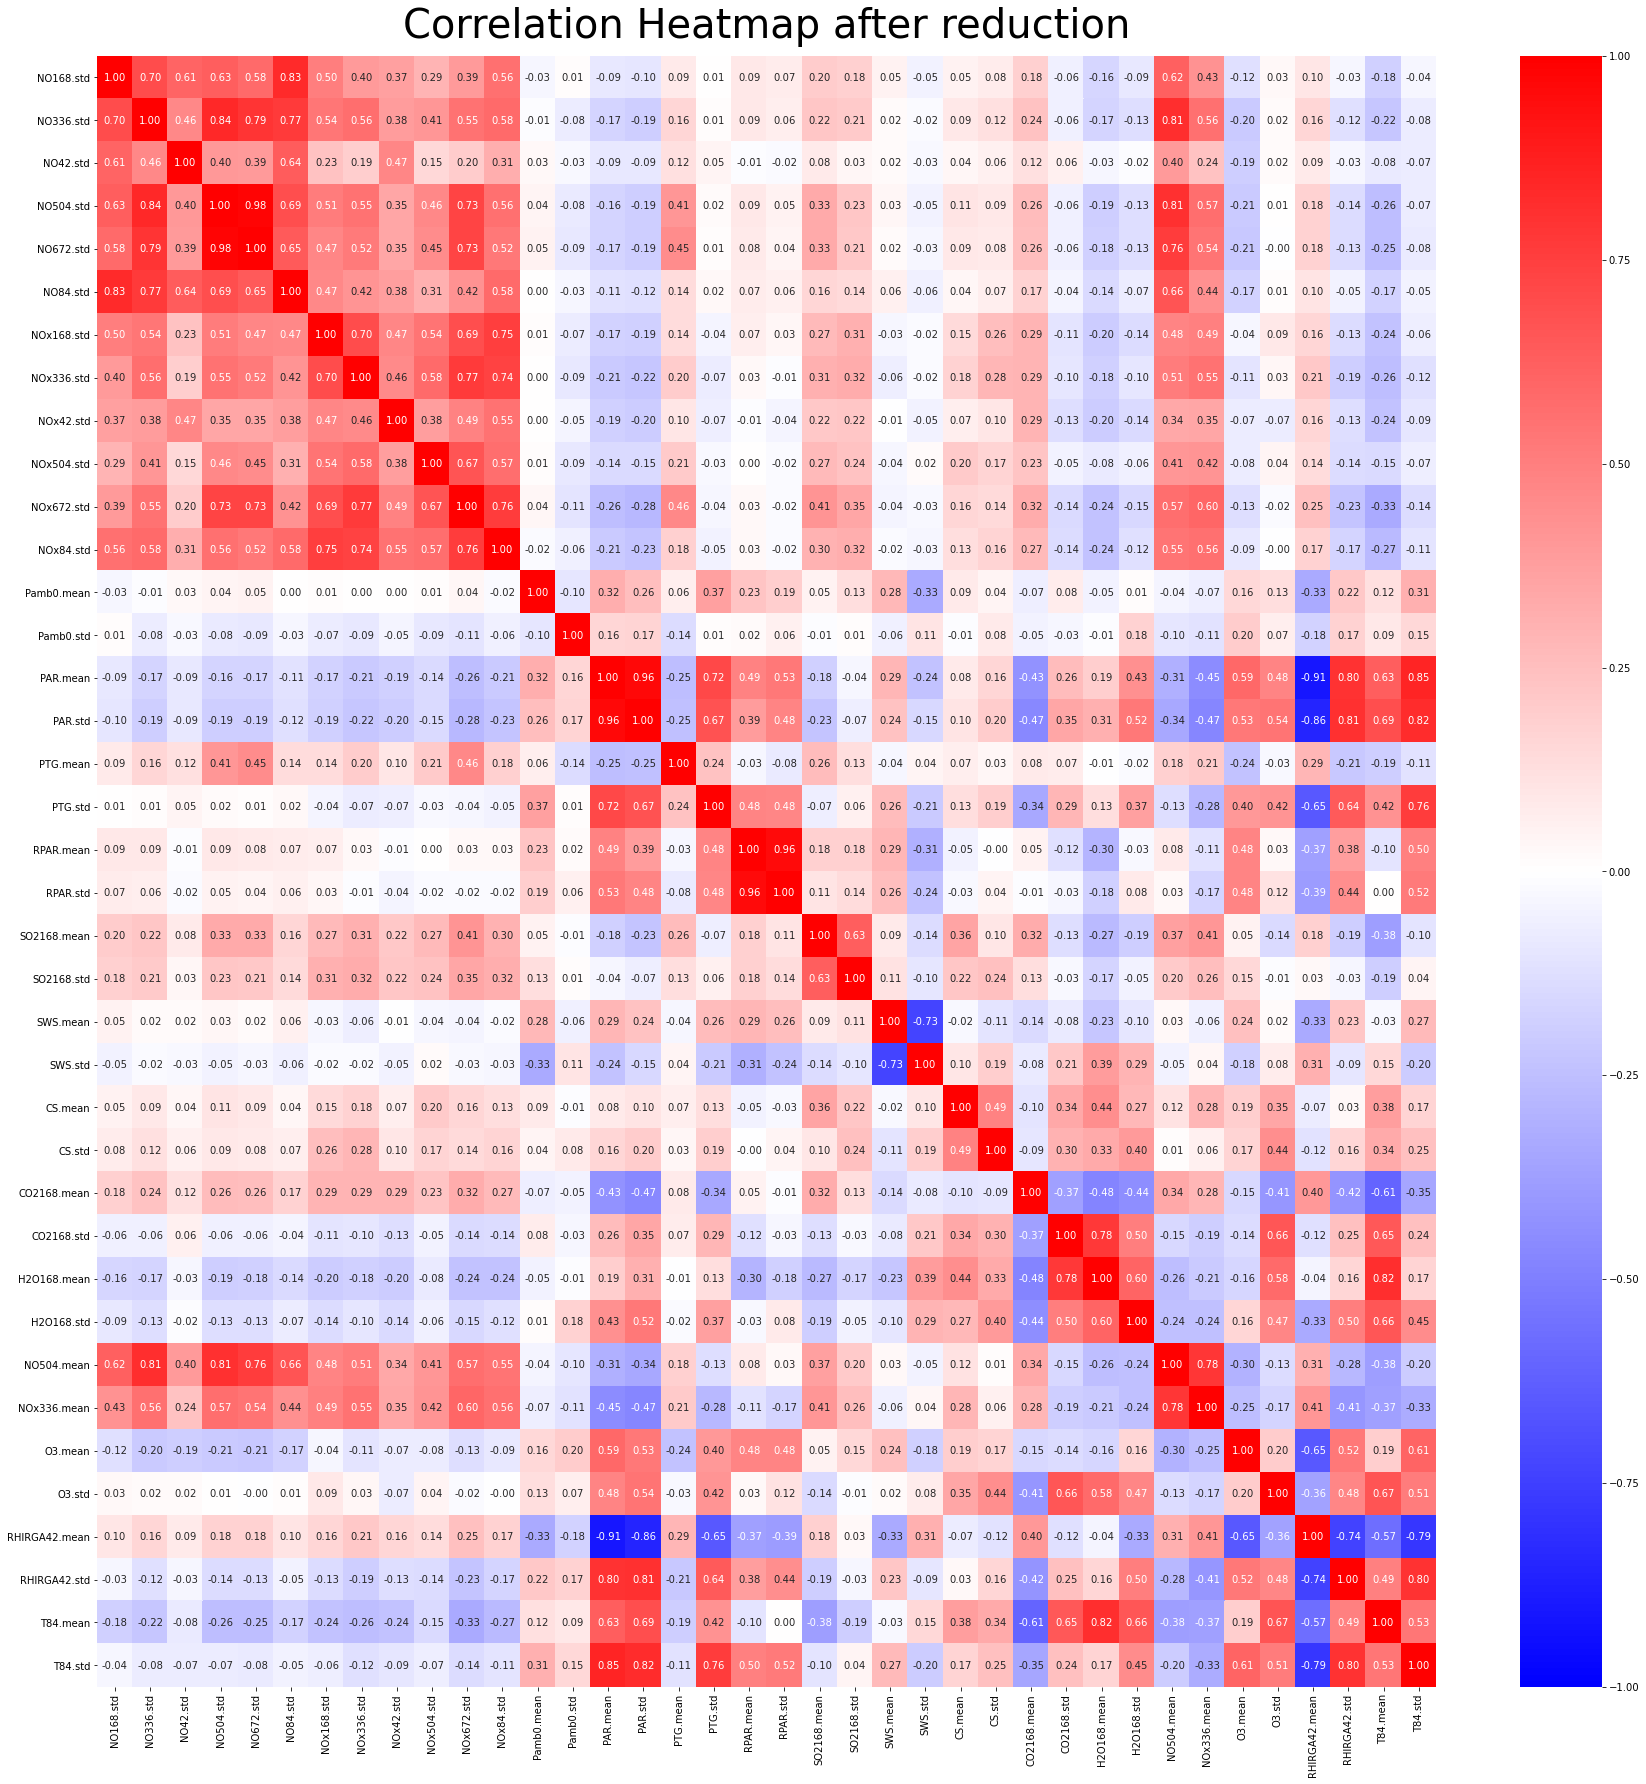

In [74]:
f = plt.figure(figsize=(30, 30))
heatmap = sns.heatmap(new_data.corr(method='pearson'), vmin=-1, vmax=1,cmap='bwr',annot=True,fmt=".2f")
heatmap.set_title('Correlation Heatmap after reduction',fontdict={'fontsize':40}, pad=18);
plt.show()

Now there are only 38 features, less than half of previous 100 features and we almost didn't loss any information

<AxesSubplot:xlabel='class4'>

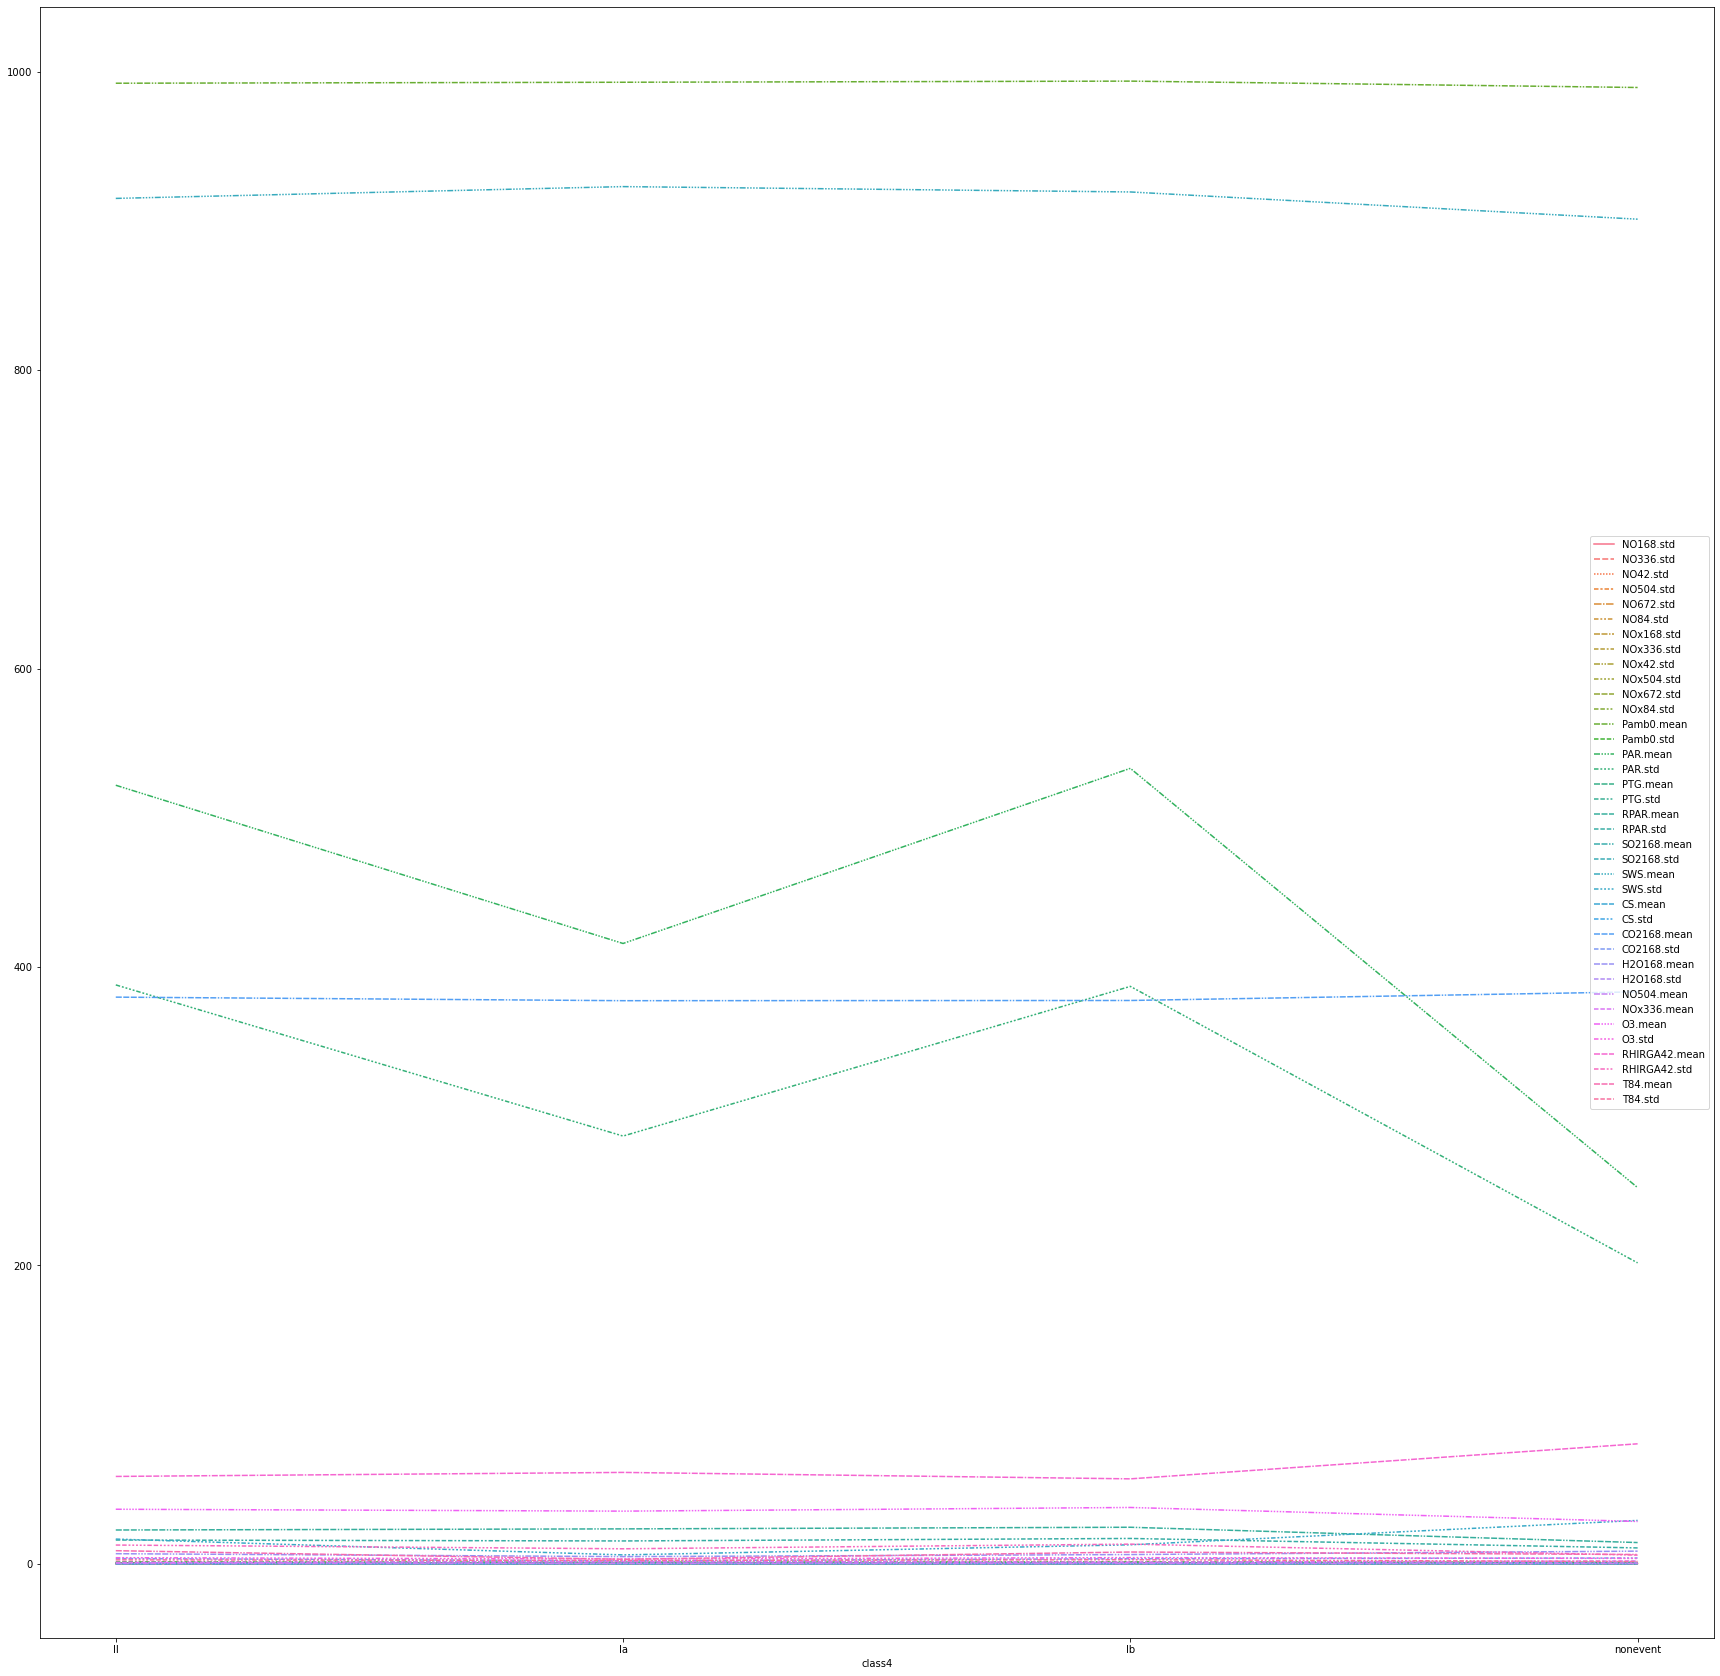

In [75]:
f = plt.figure(figsize=(30, 30))
sns.lineplot(data=new_data.groupby('class4').mean())

### Normalizaion

<AxesSubplot:xlabel='class4'>

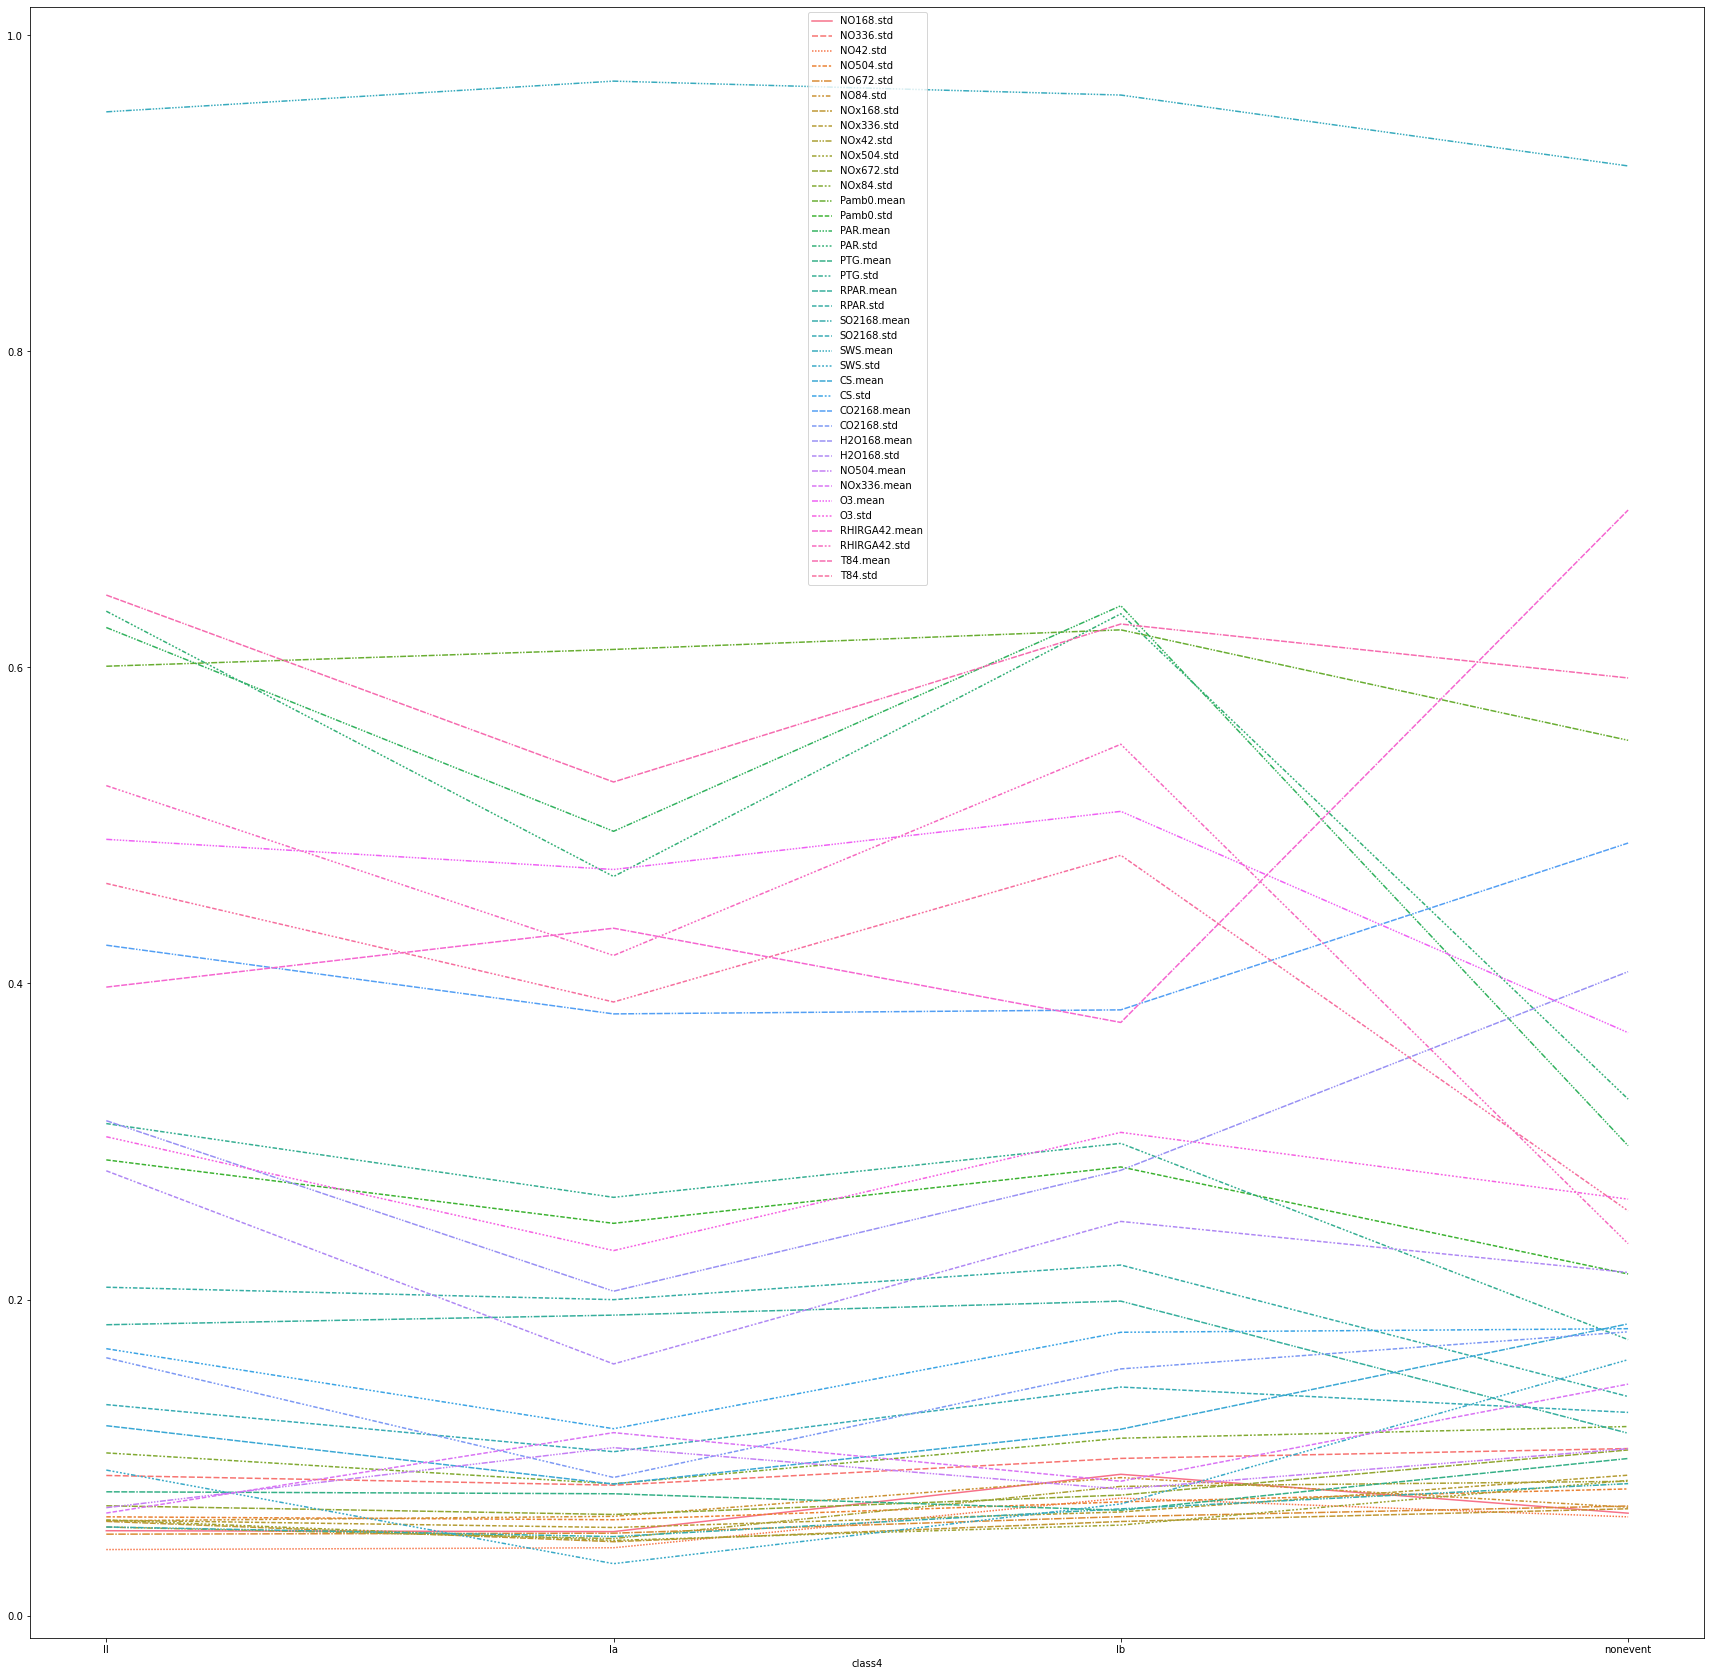

In [110]:
new_features = new_data.drop(columns=(['class4','class2']))
new_features_norm = (new_features - new_features.min())/(new_features.max()-new_features.min())
f = plt.figure(figsize=(30, 30))
new_features_norm['class4'] = new_data['class4']
sns.lineplot(data=new_features_norm.groupby('class4').mean())

Seems good but at this moment it would be a little bit hard to figure between II and Ib